In [20]:
import torch
import torch.nn as nn
from torch.fft import fft2, ifft2, fftshift, ifftshift

from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 
from tqdm import tqdm

C = loadmat('SUBMIT/C.mat')['C']
C = torch.tensor(C, dtype=torch.complex64)
m = loadmat('SUBMIT/M.mat')['M']
m = torch.tensor(m, dtype=torch.complex64)
Nc = 8

C_rss = torch.sqrt(torch.sum(torch.abs(C)**2, axis=0))+1e-12
C/=C_rss

In [22]:
U3 = torch.zeros_like(C)
U7 = torch.zeros_like(C)
U3[:, 0::2,:] = 1
U7[:, 0::7,:] = 1

b=U3*fftshift(fft2(ifftshift(C*m[:,:,None], dim=[0,1]), dim=[0,1]), dim=[0,1])

In [23]:
class E(nn.Module):
    def __init__(self, U ,C):
        super().__init__()
        self.U = U
        self.C = C
        
    def forward(self, m):
        return ifftshift(ifft2(fftshift(C*m[:,:,None], dim=[0,1]), dim=[0,1]), dim=[0,1])

E_U3 = E(U3, C)


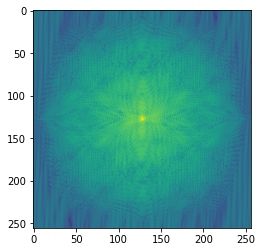

In [24]:
b=E_U3(m)
plt.imshow(torch.abs(b[:,:,0]), norm=LogNorm())